# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import re

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.mixture import GaussianMixture
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.cluster import  AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import warnings 

from IPython.display import display, HTML, Image

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

Прочитаем наш файл с исходными данными:

In [1343]:
data = pd.read_csv(
    "data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


Посмотрим на статистические характеристики признаков. 

In [1344]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


Итак, у нас есть данные о почти 542 тысячах транзакций и 8 характеристиках, которые описывают каждую из транзакций. 

In [1345]:
data.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829,541909
unique,25900,4070,4223,NaN,23260,NaN,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,17841,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,7983,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,NaN,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,NaN,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,NaN,NaN


In [1346]:
data['CustomerID'].nunique()

4372

Мы знаем, что данные описывают не только продажу, но и возврат товаров. В глаза бросается максимальное и минимальное значение признака Quantity, в данных очевидно придется разбираться с учетом проданного и возвращенного товара. На это также указывает минимальная цена за единицу товара в размере -11062 фунта (это либо очень большой возврат, либо огромная скидка, что маловероятно).

Большинство транзакций были совершены из United Kingdom, но помимо этого в данных есть информация еще о 37 странах. 

542 тыс. транзакций были совершенны 4372 клиентами данного магазина.

Также в данных есть пропуски, большинство из которых в ID клиента, что наталкивает на мысль, что такие транзакции придеться удалить, так как перед нами стоит задача кластеризация действующих клиентов магазина.

Теперь посмотрим на временные рамки, в которых мы работаем с данными. Переведите признак InvoiceDate в тип данных datetime с помощью функции pd.to_datetime(). 
Определите временные рамки, за которые представлены данные.

In [1347]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [1348]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

В данных есть пропуски в столбцах CustomerID и Description. Удалим их из признака CustomerID и проверим останутся пропуске в столбце Description.

In [1349]:
data = data.dropna()

In [1350]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Пропусков больше нет

#### 2.1.2. Дубликаты

Проверяем данные на наличие дубликатов и удаляем их из данных.


In [1351]:
print(data.duplicated().sum())
data = data.drop_duplicates()

5225


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [1352]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [1353]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled
data['QuantityCanceled']= get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [1354]:
#Проверяем сколько транзакций в данных не имеют контрагентов
mask = data[data['QuantityCanceled'] == 'Nan']
print(mask.shape[0])

0


In [1355]:
#Удаляем транзакции с отрицательным количеством товара
data = data[data['Quantity'] > 0]
data.shape

(392732, 9)

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [1356]:
pattern = r'^[a-zA-Z]+'
filtered_df = data[data['StockCode'].str.contains(pattern)]
print('Количество спец.транзакций:', filtered_df['StockCode'].nunique())
print('Специальные виды транзакций:', filtered_df['StockCode'].value_counts())

Количество спец.транзакций: 6
Специальные виды транзакций: StockCode
POST            1099
M                285
C2               133
DOT               16
BANK CHARGES      12
PADS               4
Name: count, dtype: int64


In [1357]:
#Удаляем все специальные транзакции из таблицы.
drop_values = ['POST', 'M', 'C2', 'DOT', 'BANK CHARGES', 'PADS']
data = data[data['StockCode'].isin(drop_values) == False]
data.shape[0]

391183

#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [1358]:
print(data[data['UnitPrice'] == 0].value_counts().sum())
#33 транзакции, у которых цена за единицу составляет 0 фунтов стерлингов. Удалим их
data = data[data['UnitPrice'] != 0]
print('В данных осталось {} записей'.format(data.shape[0]))

33
В данных осталось 391150 записей


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [1359]:
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [1360]:
df = data.copy()
df.to_csv('df.csv')

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



### Клиенты из каких стран покупают больше и чаще?

In [1361]:
df.groupby(['Country', 'CustomerID'])['CustomerID'].count()

Country         CustomerID
Australia       12386          10
                12388         100
                12393          64
                12415         713
                12422          21
                             ... 
United Kingdom  18287          70
Unspecified     12363          23
                12743         131
                14265          31
                16320          56
Name: CustomerID, Length: 4342, dtype: int64

Распределение клиентов по странам Country
United Kingdom    3916
Germany             94
France              87
Spain               28
Belgium             24
Switzerland         20
Portugal            19
Italy               14
Finland             12
Norway              10
Name: CustomerID, dtype: int64


Text(0, 0.5, 'Количество клиентов')

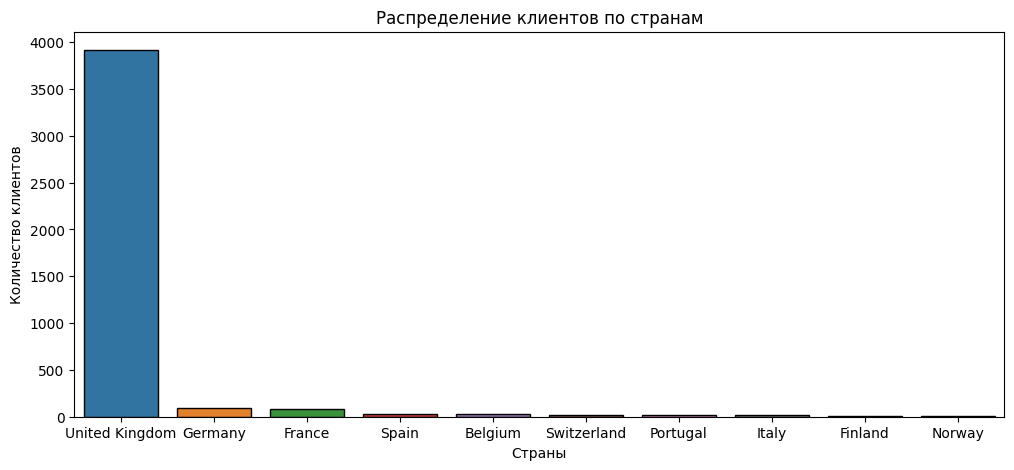

In [1362]:
#Обратим внимание, что в каждой стране ID клиента может повторятся, т к один и тот же клиент может совершать покупки не единожды, 
# поэтому удаляем такие повторы ID
count_country = df.drop_duplicates(subset='CustomerID').groupby('Country')['CustomerID'].count().sort_values(ascending=False)[:10]
print('Распределение клиентов по странам', count_country)
fig = plt.figure(figsize=(12,5))
barplot = sns.barplot(x=count_country.index, y=count_country.values)
barplot.set_title('Распределение клиентов по странам')
barplot.set_xlabel('Страны')
barplot.set_ylabel('Количество клиентов')

Country
United Kingdom    6797691.44
Netherlands        283443.54
EIRE               247074.57
Germany            201520.71
France             181529.63
Australia          136950.25
Switzerland         51863.75
Spain               51764.90
Belgium             36673.04
Sweden              36362.91
Name: TotalPrice, dtype: float64


Text(0, 0.5, 'Страны')

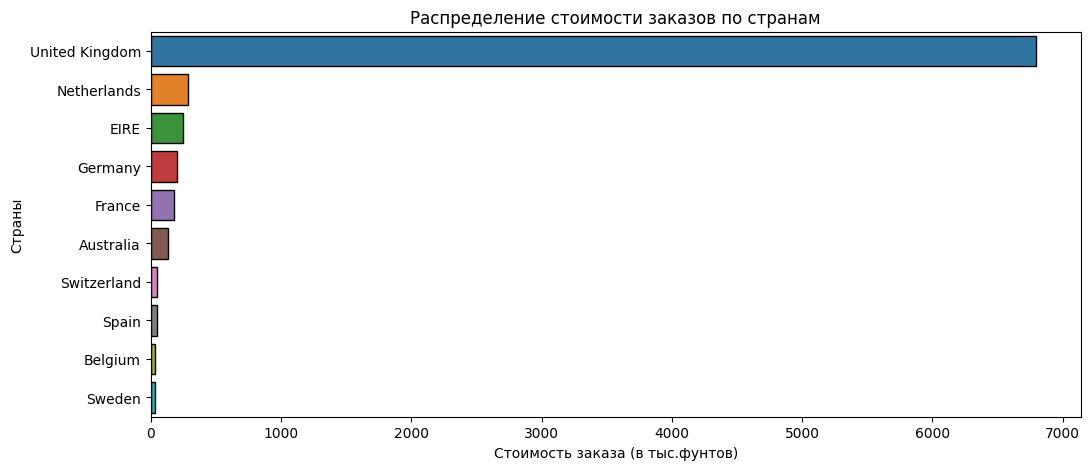

In [1363]:
count_price = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)[:10]
print(count_price)
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(y=count_price.index, x=count_price.values/1000)
ax.set_title('Распределение стоимости заказов по странам')
ax.set_xlabel('Стоимость заказа (в тыс.фунтов)')
ax.set_ylabel('Страны')

Country
United Kingdom    348872
Germany             8643
France              8019
EIRE                7126
Spain               2417
Netherlands         2322
Belgium             1935
Switzerland         1810
Portugal            1416
Australia           1180
Name: InvoiceNo, dtype: int64


Text(0, 0.5, 'Страна')

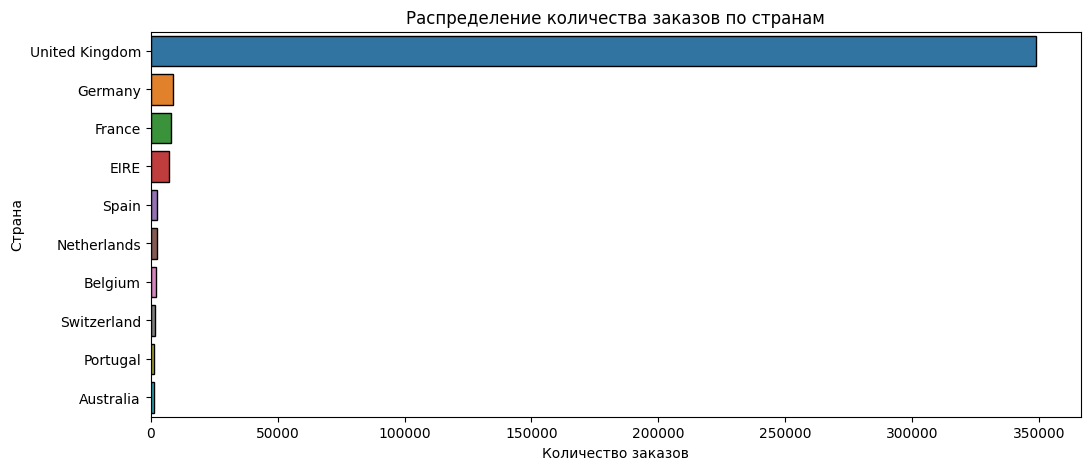

In [1364]:
count_invoice = df.groupby('Country')['InvoiceNo'].count().sort_values(ascending=False)[:10]
print(count_invoice)
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(y=count_invoice.index, x=count_invoice.values)
ax.set_title('Распределение количества заказов по странам')
ax.set_xlabel('Количество заказов')
ax.set_ylabel('Страна')

Итак, резюмируем первые выводы. Мы видим, что большинство клиентов онлайн магазина - это покупатели из Англии, Германии и Франции. На долю этих клиентов приходится больше всего заказов. Самую большую выручку магазин получает за счет продаж покупателям из Англии (6797691 фунта стерлингов). Примечательно то, что второе и третье место по объёмам выручки приносят Нидерланды и Ирландия, хотя по частоте закупок эти страны не входят в топ-3, т е эти клиенты совершают меньше покупок, но тратят больше. Что же это за клиенты, какие товары обьединяет интересы покупателей из стран, омываемых северными морями?

### Какие страны приносят наибольшую сезонную выручку?

In [1365]:
# С помощью акссесора dt выделим квартал, месяц и день недели
df['sale_month'] = df['InvoiceDate'].dt.month
df['quarter'] = df['InvoiceDate'].dt.quarter

Для начала посмотрим в целом, есть ли у клиентов магазина склонность к сезонным покупкам.

Text(0.5, 0, 'месяц')

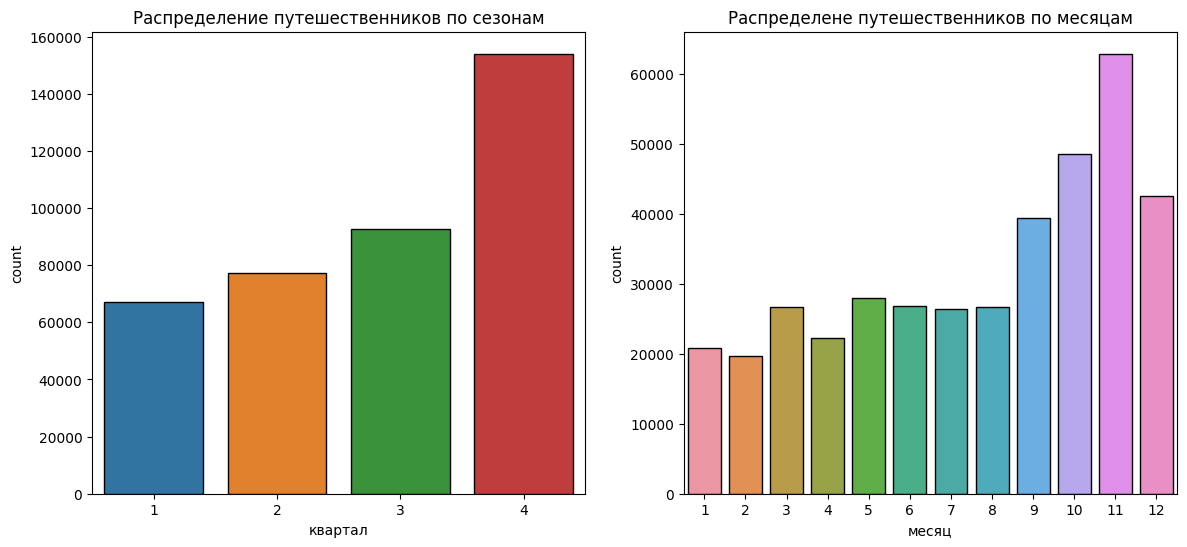

In [1366]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.countplot(x='quarter',data=df,ax=ax[0])
ax[0].set_title('Распределение путешественников по сезонам')
ax[0].set_xlabel('квартал')
sns.countplot(x='sale_month',data=df,ax=ax[1])
ax[1].set_title('Распределене путешественников по месяцам')
ax[1].set_xlabel('месяц')

Мы видим существенное увиличение продаж в 4 квартале, т е магазин пользуется популярность в холодные месяцы.
Теперь оценим сезонность в разрезе стран.

In [1367]:
# по количеству совершенных транзакций
count_invoice = count_invoice.reset_index()
top_list = count_invoice['Country']
quarter_order = df.groupby(['quarter','Country'])['InvoiceNo'].count().sort_values(ascending=False)
quarter_order = quarter_order.reset_index()
quarter_order = quarter_order[quarter_order['Country'].isin(top_list) == True]
quarter_order

,quarter,Country,InvoiceNo
0,4,United Kingdom,139299
1,3,United Kingdom,81443
2,2,United Kingdom,69016
3,1,United Kingdom,59114
4,4,Germany,3051
5,4,France,3022
6,4,EIRE,2495
7,3,EIRE,2251
8,3,Germany,2230
9,3,France,1981


In [1368]:
#по объему полученной выручки
count_price = count_price.reset_index()
top_price = count_price['Country']
quarter_price = df.groupby(['quarter', 'Country'])['TotalPrice'].sum().sort_values(ascending=False)
quarter_price = quarter_price.reset_index()
quarter_price = quarter_price[quarter_price['Country'].isin(top_price) == True]
print(quarter_order)

    quarter         Country  InvoiceNo
0         4  United Kingdom     139299
1         3  United Kingdom      81443
2         2  United Kingdom      69016
3         1  United Kingdom      59114
4         4         Germany       3051
5         4          France       3022
6         4            EIRE       2495
7         3            EIRE       2251
8         3         Germany       2230
9         3          France       1981
10        2         Germany       1783
11        1         Germany       1579
12        1          France       1562
13        2          France       1454
14        2            EIRE       1349
15        1            EIRE       1031
16        4        Portugal        735
17        4           Spain        732
18        1           Spain        665
19        4         Belgium        665
20        3           Spain        651
21        4     Netherlands        646
22        1     Netherlands        599
23        3     Switzerland        578
24        4     Switzerla

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'EIRE'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Sweden')])

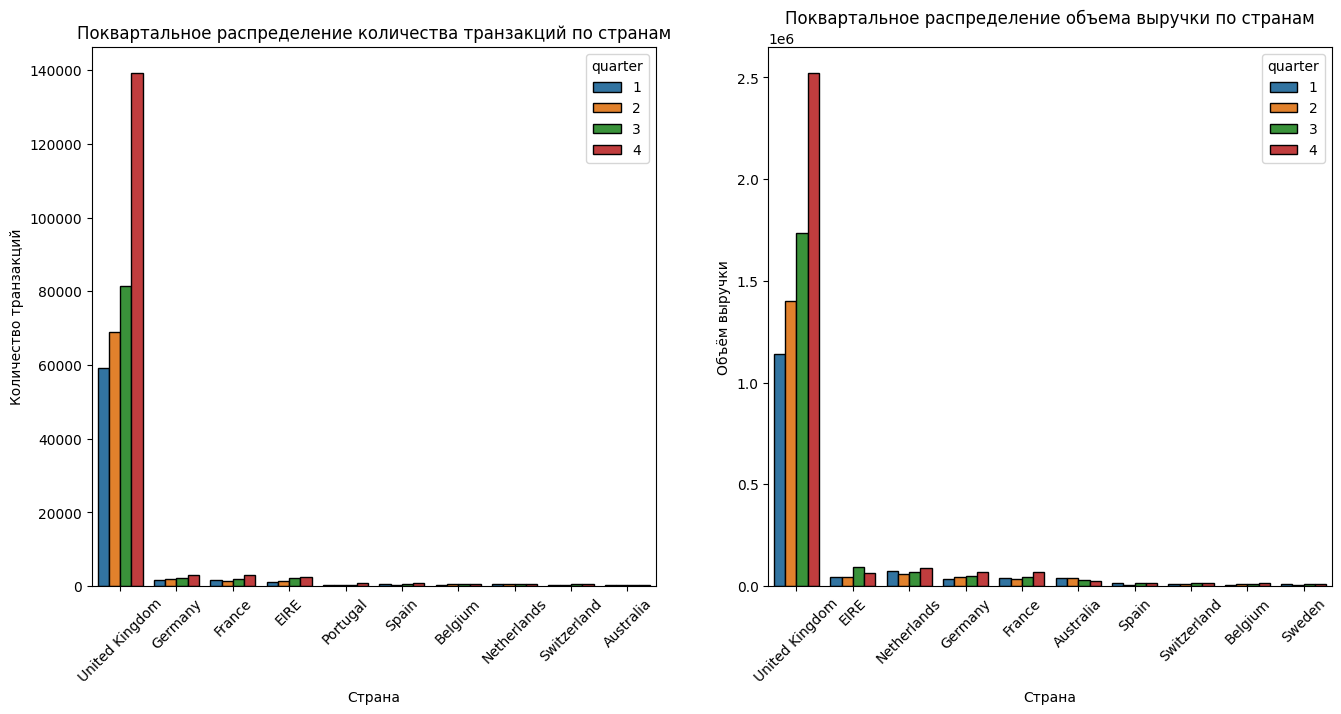

In [1369]:
fig, ax = plt.subplots(nrows= 1, ncols=2 , figsize=(16,7))
sns.barplot(data=quarter_order,
             x='Country',
             y='InvoiceNo',
             hue='quarter',
             ax=ax[0])
ax[0].set_title('Поквартальное распределение количества транзакций по странам')
ax[0].set_xlabel('Страна')
ax[0].set_ylabel('Количество транзакций')
ax[0].tick_params(axis='x', rotation=45)
sns.barplot(data=quarter_price,
             x='Country',
             y='TotalPrice',
             hue='quarter',
             ax=ax[1])
ax[1].set_title('Поквартальное распределение объема выручки по странам')
ax[1].set_xlabel('Страна')
ax[1].set_ylabel('Объём выручки')
plt.xticks(rotation=45) 


У лидера покупок, Великобритании, прослеживается очевидная сезонная тенденция. Покупатели этой страны начинают активно покупать товары к концу 3 квартала, а пик приходится на четвертый. Связано ли это с наступлением холодов, а может в предверьи новогодних праздников, нам предстоит еще выяснить. По остальным странам топ-10 ситуация примерно аналогичная, из общей картины явно выбиваются Ирландия и Нидерланды, у Ирландия по суммарному объёму трат пик приходится на 3 квартал, а у Нидерландов помимо четвертого, также активен первый квартал.

Поскольку нас больше интересует покупательская способность клиентов для дальнейшей их кластеризации, мы будем ориентироваться на признак TotalPrice. Давайте в разрезе этого признака посмотрим еще на склонность к покупкам по месяцам.

In [1370]:
month_price = df.groupby(['sale_month', 'Country'])['TotalPrice'].sum().sort_values(ascending=False)
month_price = month_price.reset_index()
month_price = month_price[month_price['Country'].isin(top_price) == True]
print(month_price[0:12])

    sale_month         Country  TotalPrice
0           11  United Kingdom   953145.16
1           12  United Kingdom   785683.01
2           10  United Kingdom   783876.95
3            9  United Kingdom   780839.07
4            5  United Kingdom   530587.22
5            8  United Kingdom   478925.72
6            7  United Kingdom   473428.92
7            6  United Kingdom   471722.19
8            3  United Kingdom   454801.96
9            4  United Kingdom   400021.11
10           2  United Kingdom   349363.11
11           1  United Kingdom   335297.02


Text(0, 0.5, 'Объём выручки')

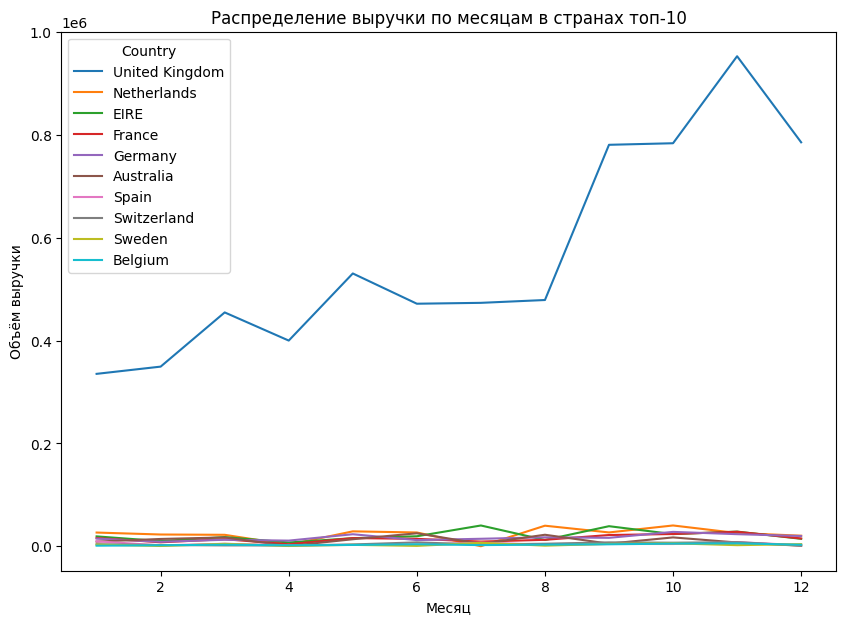

In [1371]:
fig = plt.figure(figsize=(10,7))
line = sns.lineplot(data=month_price,
                    x='sale_month',
                    y='TotalPrice',
                    hue='Country')
line.set_title('Распределение выручки по месяцам в странах топ-10')
line.set_xlabel('Месяц')
line.set_ylabel('Объём выручки')

Видим, что для Великобритании продажи резко возрастают с начала сентября и достигают максимума в ноябре. В то время, как пик продаж в Нидерландах приходится на август и октябрь, а у Ирландии на июль и сентябрь.

### Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

In [1372]:
df['day_of_week'] = df['InvoiceDate'].dt.dayofweek
df['sale_hour'] = df['InvoiceDate'].dt.hour

In [1373]:
df_day_hour = df.groupby(['day_of_week', 'sale_hour'], as_index=False)['InvoiceNo'].count()
mean_order_hour = df_day_hour.groupby('sale_hour', as_index=False)['InvoiceNo'].mean()

mean_order_day = df_day_hour.groupby('day_of_week', as_index=False)['InvoiceNo'].mean()
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
mean_order_day['day_of_week']= mean_order_day['day_of_week'].map(days)
mean_order_day.sort_values(['day_of_week'], ascending = True, inplace = True)

Text(0, 0.5, 'Среднее количество транзакций')

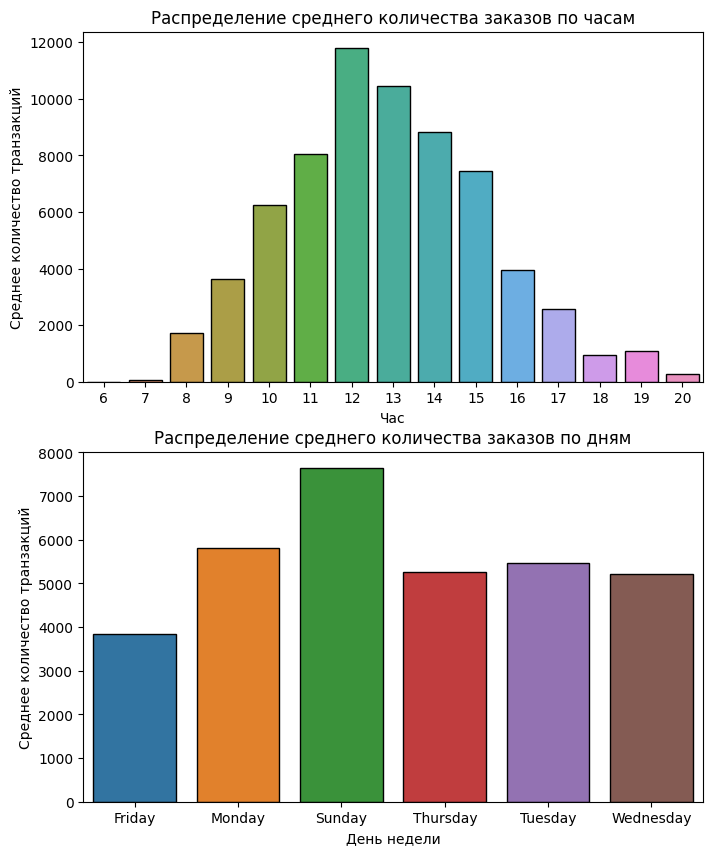

In [1374]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(8,10))
sns.barplot(data=mean_order_hour,
            x='sale_hour',
            y='InvoiceNo',
            ax=ax[0])
ax[0].set_title('Распределение среднего количества заказов по часам')
ax[0].set_xlabel('Час')
ax[0].set_ylabel('Среднее количество транзакций')
sns.barplot(data=mean_order_day,
            x='day_of_week',
            y='InvoiceNo',
            ax=ax[1])
ax[1].set_title('Распределение среднего количества заказов по дням')
ax[1].set_xlabel('День недели')
ax[1].set_ylabel('Среднее количество транзакций')

Итак мы видим, что больше всего покупок приходится на обеденное время, максимум на 12 часов дня (обеденный перерыв, ланч, сиеста), т е время свободное от работы, когда его надо чем то заполнить, и здесь как раз на помощь приходит онлайн shopping. В среднем покупки совершаются с 6 утра (с минимальным средним значением) и до 8 часов вечера, что логично, в оставшиеся часы люди отдыхают и спят.

Что касается дня недели, то конечно самый большое количество продаж приходится на выходной, на воскресенье. Любопытно, что в субботу нет ни одной продажи. Возможно это важно, для понимания кем являются клиенты магазина, чем они занимаются, какие у них интересы, почему в субботу они не совершают покупки, может для них это семейный день или день вне дома, а может вообще без интернета. Минимальное количество продаж приходится на пятницу, что служит своеобразным подтверждением того, что у большинства покупателей есть иные планы на грядущие выходные, чем шопинг. Однако, этому может быть и очень банальное объяснение - выходной магазина.

Поскольку больше всего покупателей у нас из Великобритании, посмотрим как обстоят дела с клиентами данной страны, только на этот раз будем считать не среднее количество транзакций, а среднее значение прибыли магазина.

In [1375]:
df_uk = df[df['Country'] == 'United Kingdom']
uk_day_hour = df_uk.groupby(['day_of_week', 'sale_hour'], as_index=False)['TotalPrice'].sum()
uk_order_hour = uk_day_hour.groupby('sale_hour', as_index=False)['TotalPrice'].mean()

uk_order_day = uk_day_hour.groupby('day_of_week', as_index=False)['TotalPrice'].mean()
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
uk_order_day['day_of_week']= uk_order_day['day_of_week'].map(days)
uk_order_day.sort_values(['day_of_week'], ascending = True, inplace = True)

Text(0, 0.5, 'Средний объём выручки')

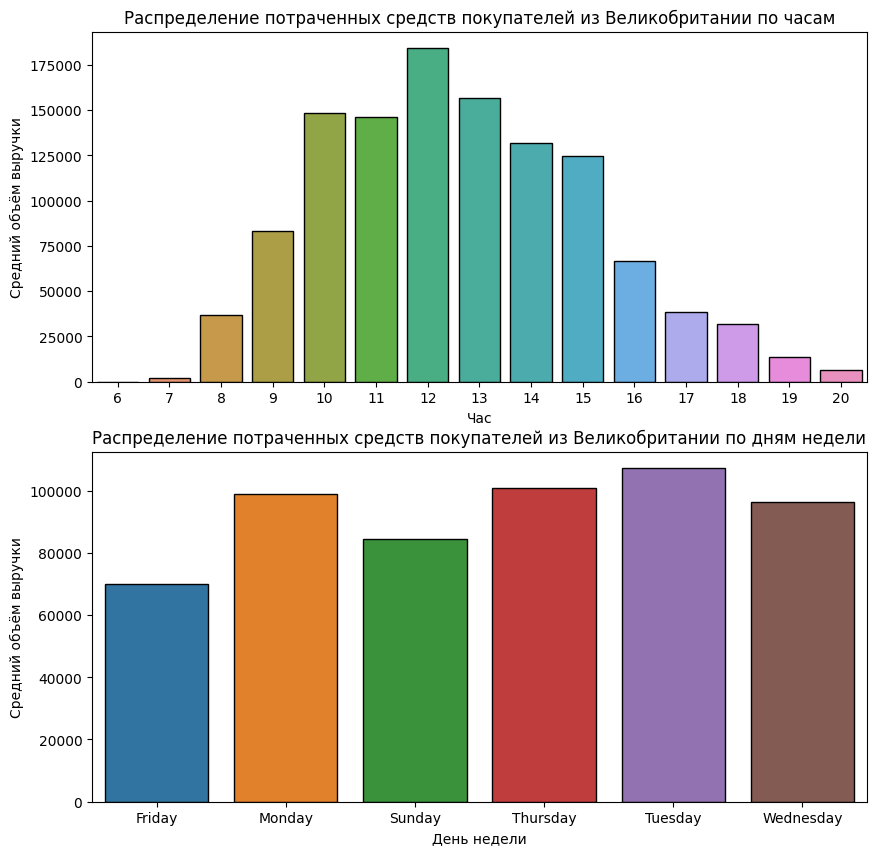

In [1376]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(10,10))
sns.barplot(data=uk_order_hour,
            x='sale_hour',
            y='TotalPrice',
            ax=ax[0])
ax[0].set_title('Распределение потраченных средств покупателей из Великобритании по часам')
ax[0].set_xlabel('Час')
ax[0].set_ylabel('Средний объём выручки')
sns.barplot(data=uk_order_day,
            x='day_of_week',
            y='TotalPrice',
            ax=ax[1])
ax[1].set_title('Распределение потраченных средств покупателей из Великобритании по дням недели')
ax[1].set_xlabel('День недели')
ax[1].set_ylabel('Средний объём выручки')

В целом мы наблюдаем похожую картину, что понятно, т к клиенты из Великабритании формируют основную статистику. Больше всего денег англичане тратят днем, с 10 до 13, при этом самые дорогие покупки предпочитают совершать в будни. Опять же видим, что в субботу не было совершено ни одной покупки, что скорее всего говорит о выходном дне в магазине.

Рассмотрим еще один признак в наших данных - это признак с уникальным кодом товара. Не думаю, что удасться выудить из него много информации, но возможно поможет понять клиентов магазина и их предпочтения.

In [1377]:
print('Количество уникальных товаров в ассортименте магазина:', df['StockCode'].nunique())

Количество уникальных товаров в ассортименте магазина: 3659


У нас 3569 уникальных товаров, часть из них покупается очень часто, а часть нет. Давайте посмотрим какие позиции приносят прибыль, а какие нет.
Для этого сгруппируем данные по коду товара и посмотрим, сколько каждая позиция принесла прибыли.

In [1378]:
item_profit = df.groupby('StockCode', as_index=False)['TotalPrice'].sum().sort_values(by='TotalPrice', ascending=False)
print(len(item_profit[item_profit['TotalPrice'] <= 0]), 'позиций не принесли магазину прибыли')

14 позиций не принесли магазину прибыли


В целом, это конечно капля в море, но магазин может избавиться от этих товаров и сэкономить на издержках.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [1379]:
t0 = pd.to_datetime('2011-12-10 00:00:00')
df_recency = df.groupby('CustomerID', as_index=False)['InvoiceDate'].max()
df_recency['Recency'] = (t0 - df_recency['InvoiceDate']).dt.days
df_recency = df_recency.drop('InvoiceDate', axis=1)
df_recency

,CustomerID,Recency
0,12346,325
1,12347,2
2,12348,75
3,12349,18
4,12350,310
...,...,...
4329,18280,277
4330,18281,180
4331,18282,7
4332,18283,3


In [1380]:
df_frequency = df.groupby('CustomerID', as_index=False)['InvoiceNo'].nunique()
df_frequency

,CustomerID,InvoiceNo
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1
...,...,...
4329,18280,1
4330,18281,1
4331,18282,2
4332,18283,16


In [1381]:
df_monetary = df.groupby('CustomerID', as_index=False)['TotalPrice'].sum()
df_monetary

,CustomerID,TotalPrice
0,12346,0.00
1,12347,4310.00
2,12348,1437.24
3,12349,1457.55
4,12350,294.40
...,...,...
4329,18280,180.60
4330,18281,80.82
4331,18282,176.60
4332,18283,2039.58


In [1382]:
#Объединяем полученные таблицы в одну
RFM_tab = df_recency.merge(df_frequency, on='CustomerID', how='inner').merge(df_monetary, on='CustomerID', how='inner')
RFM_tab = RFM_tab.rename(columns={'InvoiceNo':'Frequency', 'TotalPrice':'Monetary'})
RFM_tab = RFM_tab.set_index('CustomerID')
RFM_tab

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18280,277,1,180.60
18281,180,1,80.82
18282,7,2,176.60


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

<AxesSubplot: xlabel='Monetary'>

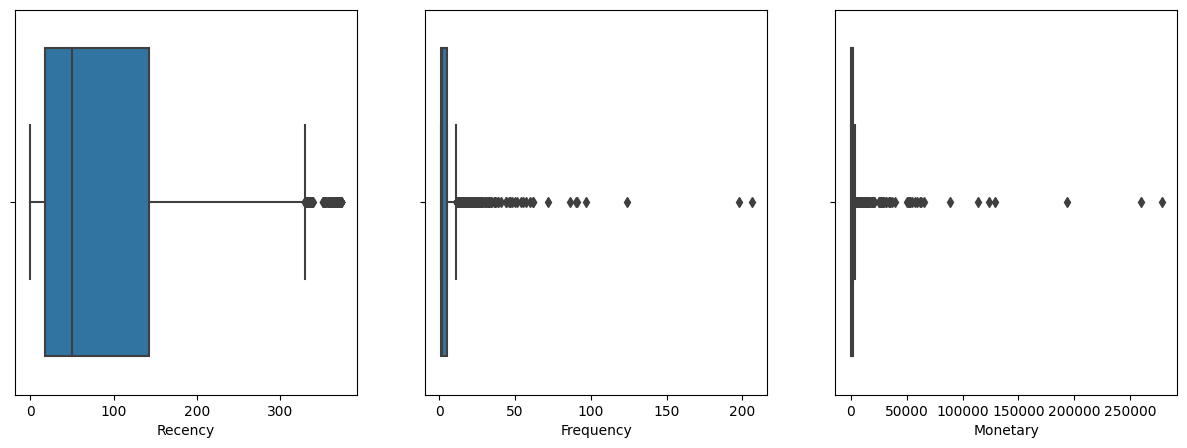

In [1383]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(RFM_tab, x='Recency', ax=ax[0])
sns.boxplot(RFM_tab, x='Frequency', ax=ax[1])
sns.boxplot(RFM_tab, x='Monetary', ax=ax[2])


Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [1384]:
RFM_tab = RFM_tab[(RFM_tab['Frequency'] <= RFM_tab['Frequency'].quantile(0.95)) & (RFM_tab['Monetary'] <= RFM_tab['Monetary'].quantile(0.95))]
RFM_tab

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,0.00
12347,2,7,4310.00
12348,75,4,1437.24
12349,18,1,1457.55
12350,310,1,294.40
...,...,...,...
18278,73,1,173.90
18280,277,1,180.60
18281,180,1,80.82


<AxesSubplot: xlabel='Monetary'>

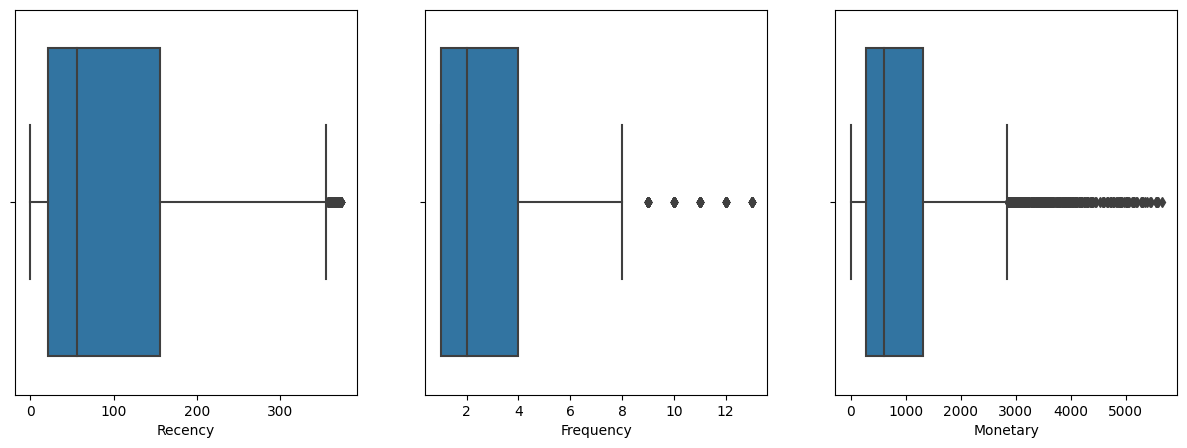

In [1385]:
#Вновь посмотрим на коробчатые диаграммы каждого из трех компонентов
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.boxplot(RFM_tab, x='Recency', ax=ax[0])
sns.boxplot(RFM_tab, x='Frequency', ax=ax[1])
sns.boxplot(RFM_tab, x='Monetary', ax=ax[2])

После удаления данных тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов, у нас осталось записи о 4044 клиентов. Без этих клиентов на коробчатых диаграммах мы видим вполне допустимую картину.

Попробуем визуализировать данные в виде трехмерного распределения наших признаков.

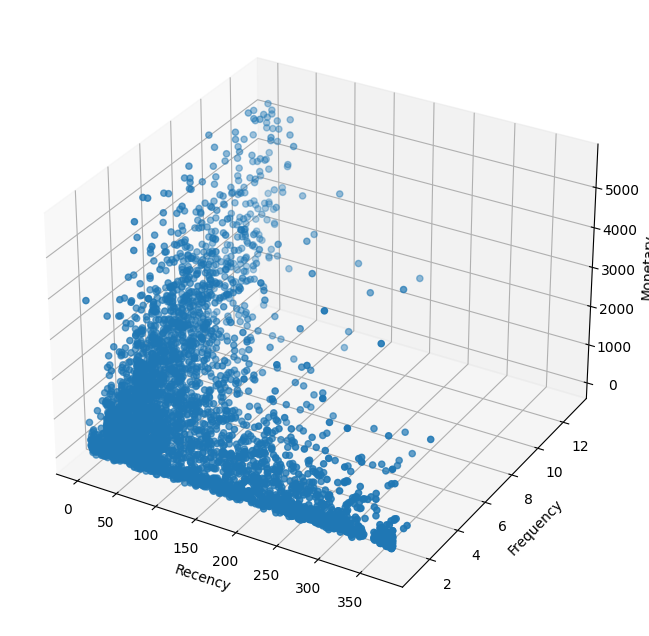

In [1386]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

x = RFM_tab.Recency,
y = RFM_tab.Frequency, 
z = RFM_tab.Monetary,
ax.scatter(x, y, z)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

Сложно сказать что то конкретное: мы видим области концентрации признаков, также довольно четко выделяются зоны, характерные для клиентов, которым свойственна склонность к значительным тратам. В целом визуально пока сложно провести кластеризацию клиентов, поэтому перейдем к этапу моделирования.

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [1387]:
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
pipeline.fit(RFM_tab)
RFM_tab_norm = pipeline.transform(RFM_tab)
RFM_tab_norm = pd.DataFrame(RFM_tab_norm, columns=['Признак_1', 'Признак_2'])
print('Уменьшаем размерность исходных признаков до', len(pipeline['pca'].components_),
      'компонентов, которые объясняют {:.2} долю дисперсии исходных данных'.format(pipeline['pca'].explained_variance_ratio_[0]))

Уменьшаем размерность исходных признаков до 2 компонентов, которые объясняют 0.68 долю дисперсии исходных данных


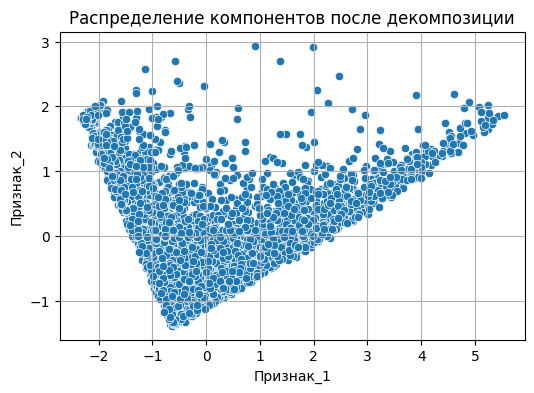

In [1388]:
fig = plt.figure(figsize=(6,4))
scatt = sns.scatterplot(x=RFM_tab_norm['Признак_1'],
                y=RFM_tab_norm['Признак_2'])
scatt.set_title('Распределение компонентов после декомпозиции')
scatt.grid()

Хочу отметить, что двумерный график очень похож на трехмерный, что свидетельствует о сохранении значительной части исходной информации.

Ну а теперь перейдем непосредственно к кластеризации клиентов магазина. Сначала применим метод k-means, а для определения оптимального количества кластеров воспользуемся коэффициентом силуэта

In [1389]:
kmeans_sil = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(RFM_tab_norm)
    sil_score = silhouette_score(RFM_tab_norm, kmeans.labels_)
    kmeans_sil.append((i,sil_score))
      
kmeans_sil = pd.DataFrame(kmeans_sil, columns=['number_of_cluster', 'sil_score'])
kmeans_sil

,number_of_cluster,sil_score
0,3,0.524230
1,4,0.497553
2,5,0.454544
3,6,0.448006
4,7,0.420295
5,8,0.420745
6,9,0.408957
7,10,0.397843


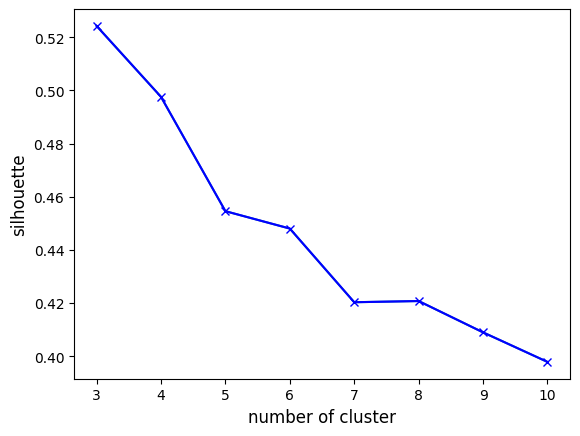

In [1390]:
#Посмотри на графике оптимальное количество кластеров
sns.lineplot(x = kmeans_sil.number_of_cluster, y=kmeans_sil.sil_score)
plt.xlabel("number of cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], kmeans_sil.sil_score, 'xb-')

Видим, что максимального значения коэффициент силуэта (0.52) достигает при количестве кластеров, равное трем. Запомним эти значения для дальнейшего выбора оптимальной модели кластеризации. А теперь перейдем к следующей модели: ЕМ - алгориту

In [1391]:
gauss_sil = []

for i in range(3, 11):
    gm = GaussianMixture(n_components= i, random_state = 42)
    gm.fit(RFM_tab_norm)
    gm_sil_score = silhouette_score(RFM_tab_norm, gm.predict(RFM_tab_norm))
    gauss_sil.append((i,gm_sil_score))
      
gauss_sil = pd.DataFrame(gauss_sil, columns=['number_of_cluster', 'gauss_score'])
gauss_sil

,number_of_cluster,gauss_score
0,3,0.436061
1,4,0.350103
2,5,0.246969
3,6,0.266670
4,7,0.198851
5,8,0.196880
6,9,0.157627
7,10,0.109445


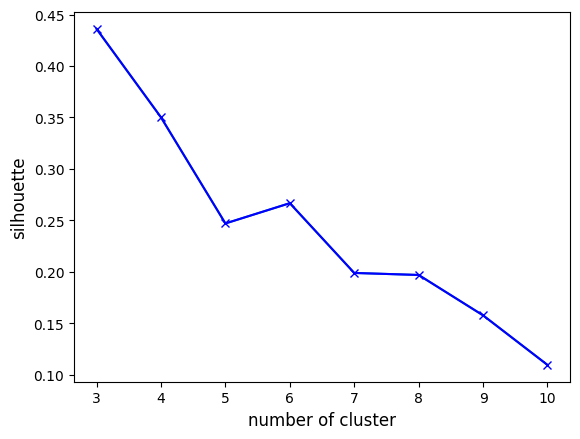

In [1392]:
#Посмотри на графике оптимальное количество кластеров
sns.lineplot(x = gauss_sil.number_of_cluster, y=gauss_sil.gauss_score)
plt.xlabel("number of cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], gauss_sil.gauss_score, 'xb-')

Вновь максимальное значение метрики достигается при числе кластеров, равном трем, однако соответствующее значение коэффициента силуэта при использовании алгоритма EM (0.44) меньше, чем при использовании kmeans.

Воспользуемся следующим алгоритмом агломеративной иерархической кластеризации.

In [1393]:
agg_sil = []

for i in range(3, 11):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(RFM_tab_norm)
    agg_sil_score = silhouette_score(RFM_tab_norm, agg.labels_)
    agg_sil.append((i, agg_sil_score))
    
agg_sil = pd.DataFrame(agg_sil, columns=['number_of_cluster', 'agg_score'])
agg_sil

,number_of_cluster,agg_score
0,3,0.496759
1,4,0.425310
2,5,0.439062
3,6,0.421116
4,7,0.412763
5,8,0.363473
6,9,0.350987
7,10,0.324734


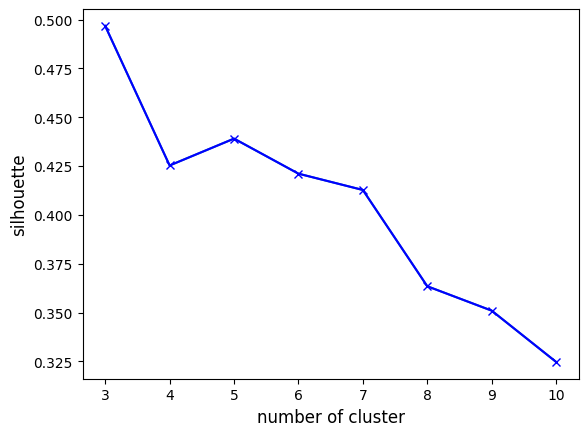

In [1394]:
sns.lineplot(x = agg_sil.number_of_cluster, y=agg_sil.agg_score)
plt.xlabel("number of cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(3, 11)], agg_sil.agg_score, 'xb-')

Что ж опять видим, что оптимальное количество кластеров состовляет три, но агломеративная кластеризация все равно дает меньшее значение коэф-та силуэта (0.5), чем Kmeans алгоритм, поэтому именно его возьмем в качестве модели для кластеризации клиентов онлайн магазина. 

P.S. Также я попробовала применить DBSCAN алгоритм, но данный алгорим выделяет только один кластер. Думаю такой результат не очень устроит заказчика.

cluster
2    2269
0     999
1     776
Name: count, dtype: int64


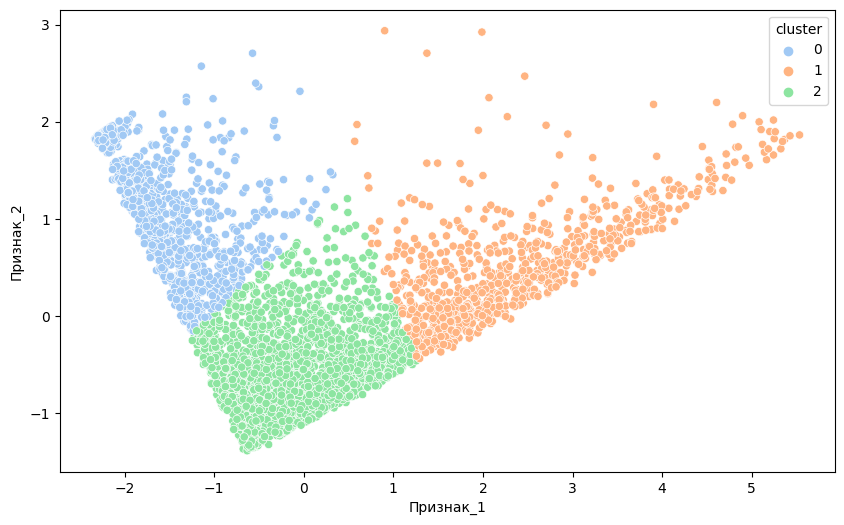

In [1395]:
#Обучаем модель на трех кластерах, делаем визуализацию
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(RFM_tab_norm)
RFM_tab_norm['cluster'] = kmeans.labels_
print(RFM_tab_norm['cluster'].value_counts())
plt.figure(figsize=(10,6))
sns.scatterplot(data=RFM_tab_norm, x='Признак_1', y='Признак_2', hue='cluster', palette='pastel')
plt.show()

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируем результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

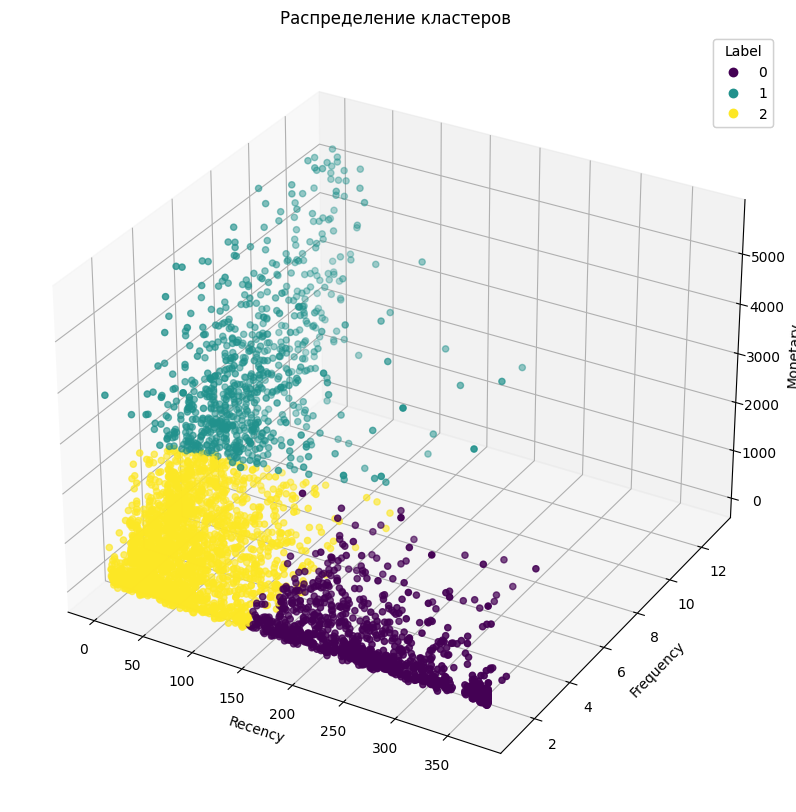

In [1396]:
RFM_tab['Label'] = kmeans.labels_

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d') 
scatter = ax.scatter(xs=RFM_tab['Recency'], 
           ys=RFM_tab['Frequency'], 
           zs= RFM_tab['Monetary'], 
           c=RFM_tab['Label'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Распределение кластеров')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Label")
ax.add_artist(legend)

Итак, мы получили 3-d  визуализацию трех кластеров клиентов на основе признаков Recency, Frequency и Monetary. Попробует интерпритировать каждый из кластеров: 

- Кластер 0: первым бросается в глаза, т к отличается высокими показателями Frequency и Monetary, т е это те клиенты, которые тратят много и часто, при этом кластер имеет малые значения Recency, что опять же говорит о регулярности совершения покупок. Можно назвать этих клиентов "Лояльными".

- Кластер 1: характеризуется концентрацией значений на достаточно низном уровне Frequency и Monetary, т е это те клиенты, которые давно совершали покупки, в диапозоне от 130 до 360 дней назад, и тратять не много денег на покупки, до 1000 фунтов стерлингов. Назовем этих клиентов "Холодными".

- Кластер 2: это клиенты с низким уровнем Frequency и Recency. Этих клиентов можно назвать "Перспективными", т к они не так давно совершали покупки, менее 130 дней назад, но делают это не часто, при этом тратя не более 2000 фунтов стерлингов.

#### 3.2.2. Построение профиля кластеров

Далее составим так называемый профиль кластеров. Для этого нам необходимо вернуться от декомпозированных данных к RFM-таблице (очищенной от выбросов).

Сгруппируем RFM-таблицу по полученным кластерам и рассчитаем среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [1397]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    fig.show()
    
    fig.write_html('newplot.html')
    Image('newplot.png')

Теперь у нас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [1398]:
df_group_rfm = RFM_tab.groupby('Label')[['Recency', 'Frequency', 'Monetary']].mean()
print(df_group_rfm)
plot_cluster_profile(df_group_rfm, 3)

          Recency  Frequency     Monetary
Label                                    
0      253.474474   1.403403   386.277297
1       31.943299   7.068299  2657.746997
2       51.221684   2.329220   660.068947


В результате визуализации профиля кластеров мы видим такую же картину, что и ранее. Кластер 1, который мы назвали "Холодными" клиентами, которые давно не делали заказов, не приносят прибыли и не являются основным фокусом внимания магазина. Кластер 2 имеет примерно одинаковое, малое значениям по всем трем направлениям. Возможно имеет смысл поработать с данной группой клиентов, т к наверняка в этом классе есть потенциальные клиенты. И наконец Кластер 0, самый малочисленный, но привносящий наибольший вклад в получении прибыли магазином, это самые лояльные клиенты, которые тратят много и часто.

## 4. Выводы и оформление работы

In [1399]:
#Объединяем наши таблицы и сохоаняем полученный результат
RFM_tab_1 = RFM_tab.copy()
RFM_tab_1.reset_index(inplace=True)
df_1 = df.copy()
finall_df = df_1.merge(RFM_tab_1, on='CustomerID', how='right')
finall_df.to_csv('finall_df.csv')
finall_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,sale_month,quarter,day_of_week,sale_hour,Recency,Frequency,Monetary,Label
0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,74215.0,0.0,1,1,1,10,325,1,0.0,0
1,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347,Iceland,0.0,25.2,12,4,1,14,2,7,4310.0,1
2,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347,Iceland,0.0,17.0,12,4,1,14,2,7,4310.0,1


По итогу проделанной работы нам удалось выделить 3 кластера клиентов онлайн магазина. Для достижения этого результата мы провели преобработку и очистку исходных данных, провели разведовательный анализ с целью выявление первичных закономерностей, построили несколько модель машинного обучения, которые решают задачу кластеризации наших клиентов, выбрали оптимальную из них, показывающую лучший результат, и наконец, определили количество кластеров, проинтерпретировав их. 

В процессе реализации проекта мы выявили, что большинство клиентов магазина являются гражданами Великобритании. В целом у покупателей есть сезонная склонность, большинство продаж совершаются в 3, и пик в 4 квартале года. Также мы выяснили, что основные продажи совершаются в обеденное время, и пик приходится на 12 часов дня.

При использовании различных алгоритмов для кластеризации клиентов, наилучший результат показал KMeans алгорит, который и разделил наших клиентов на 3 кластера: "Лояльные", "Холодные", "Перспективные". Наибольший вклад в получении прибыли магазином вносят "Лояльные" клиенты, на которых в первую очередь должна быть направлена маркетинговая компания, но также стоить не забывать об упущенной выгоде, и попробовать перевести хотя бы часть клиентов из "Перспективных" в "Лояльные".

## 5. Дополнительные шаги

<AxesSubplot: xlabel='Label', ylabel='Monetary'>

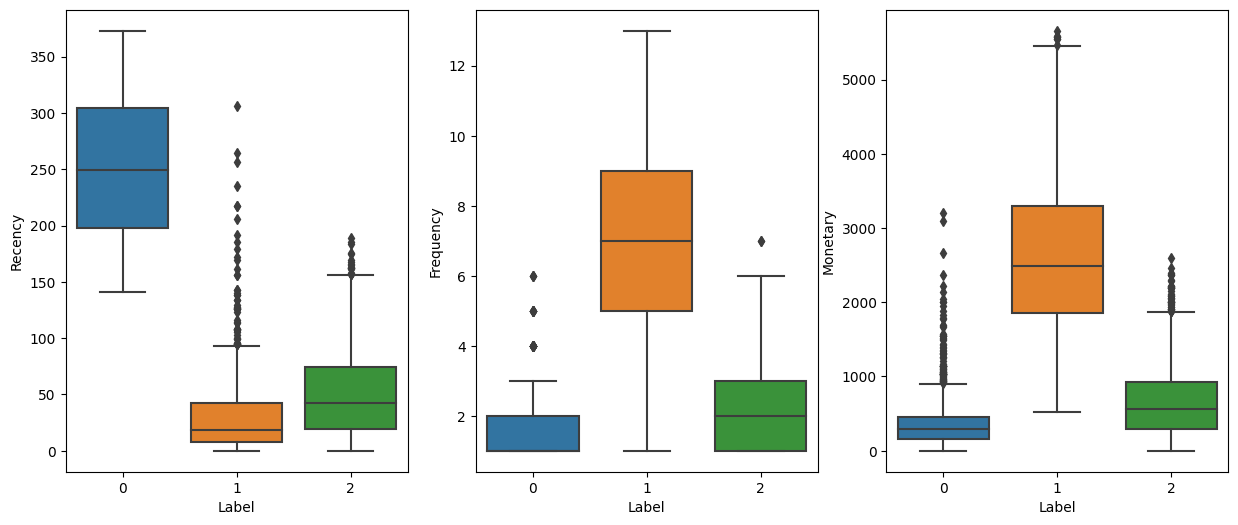

In [1400]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
sns.boxplot(RFM_tab_1, x='Label', y='Recency', ax=ax[0])
sns.boxplot(RFM_tab_1, x='Label', y='Frequency', ax=ax[1])
sns.boxplot(RFM_tab_1, x='Label', y='Monetary', ax=ax[2])

Проверим одну теорию. На графике мы видим, что значения каждого из кластера имеют выбросы по одному из признаков, да и при визуализации наших трех кластеров в двумерном и трехмерном пространстве, мы наблюдаем, как часть значений находится в отдалении от основного скопления значений кластера. Что если к нашей таблице RFM необходимо добавить еще один признак, который повысит уровень информативности данных для кластеризации?

Давайте посмотрим на признак количества приобретаемого товара в исходном датасете.

In [1401]:
df_quantity = df_1.groupby('CustomerID', as_index=False)['Quantity'].count().sort_values(by='Quantity', ascending=False)
df_quantity

,CustomerID,Quantity
4007,17841,7667
1879,14911,5584
1289,14096,5095
326,12748,4397
1661,14606,2674
...,...,...
1037,13747,1
3720,17443,1
2362,15562,1
1001,13703,1


Видим, что некоторые покупатели совершают очень много заказов, скорее всего это клиенты-оптовики, которые занимаются перепродажей. Добавим признак Quantity к RFM-таблице 

In [1402]:
RFMQ_tab = RFM_tab_1.merge(df_quantity, on='CustomerID', how='inner')
RFMQ_tab.drop('Label', axis=1, inplace=True)
RFMQ_tab = RFMQ_tab.set_index('CustomerID')
RFMQ_tab

,Recency,Frequency,Monetary,Quantity
CustomerID,,,,
12346,325,1,0.00,1
12347,2,7,4310.00,182
12348,75,4,1437.24,27
12349,18,1,1457.55,72
12350,310,1,294.40,16
...,...,...,...,...
18278,73,1,173.90,9
18280,277,1,180.60,10
18281,180,1,80.82,7


In [1403]:
#Нормализуем признаки
scaler = StandardScaler()
RFMQ_tab_scaled = scaler.fit_transform(RFMQ_tab)
#Уменьшим размерность
pca = PCA(n_components=0.7)
RFMQ_tab_norm = pca.fit_transform(RFMQ_tab_scaled)
RFMQ_tab_norm = pd.DataFrame(RFMQ_tab_norm, columns=['Признак_1', 'Признак_2' ])
len(pca.components_)

2

In [1404]:
#И вновь пройдемся по используемым ранее алгоритмам
kmeans_sil = []

for i in range(3, 11):
    kmeans = KMeans(n_clusters=i, random_state = 42)
    kmeans.fit(RFMQ_tab_norm)
    sil_score = silhouette_score(RFMQ_tab_norm, kmeans.labels_)
    kmeans_sil.append((i,sil_score))
      
kmeans_sil = pd.DataFrame(kmeans_sil, columns=['number_of_cluster', 'sil_score'])
kmeans_sil

,number_of_cluster,sil_score
0,3,0.509353
1,4,0.498942
2,5,0.465399
3,6,0.445489
4,7,0.427056
5,8,0.430031
6,9,0.403329
7,10,0.405477


In [1405]:
gauss_sil = []

for i in range(3, 11):
    gm = GaussianMixture(n_components= i, random_state = 42)
    gm.fit(RFMQ_tab_norm)
    gm_sil_score = silhouette_score(RFMQ_tab_norm, gm.predict(RFMQ_tab_norm))
    gauss_sil.append((i,gm_sil_score))
      
gauss_sil = pd.DataFrame(gauss_sil, columns=['number_of_cluster', 'gauss_score'])
gauss_sil

,number_of_cluster,gauss_score
0,3,0.430577
1,4,0.378445
2,5,0.357336
3,6,0.273106
4,7,0.261632
5,8,0.247782
6,9,0.220520
7,10,0.154018


In [1406]:
agg_sil = []

for i in range(3, 11):
    agg = AgglomerativeClustering(n_clusters=i)
    agg.fit(RFMQ_tab_norm)
    agg_sil_score = silhouette_score(RFMQ_tab_norm, agg.labels_)
    agg_sil.append((i, agg_sil_score))
    
agg_sil = pd.DataFrame(agg_sil, columns=['number_of_cluster', 'agg_score'])
agg_sil

,number_of_cluster,agg_score
0,3,0.456556
1,4,0.436690
2,5,0.425081
3,6,0.394344
4,7,0.395060
5,8,0.403486
6,9,0.371757
7,10,0.371945


Видим точно такой же результат. Значит разбиение на три кластера- самый оптимальный вариант. Выделение в отдельный кластер оптовых покупателей не имеет для магазина особой целесообразности.